In [1]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import numpy as np
from sklearn.utils import shuffle

import h5py

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
np.random.seed(2018)

X_train = []
X_test = []

for filename in ["gap_InceptionV3.h5", "gap_InceptionResNetV2.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)

X_train, y_train = shuffle(X_train, y_train)

In [3]:
input_tensor = Input(X_train.shape[1:])
x = input_tensor
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

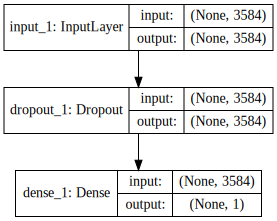

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import *

#plot_model(model, to_file='gap_model.png',show_shapes=True)
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
model.fit(X_train, y_train, batch_size=128, nb_epoch=20, validation_split=0.2)

Train on 19969 samples, validate on 4993 samples
Epoch 1/20
 5376/19969 [=======>......................] - ETA: 0s - loss: 0.0147 - acc: 0.9950

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


19969/19969 [==============================] - 1s 34us/step - loss: 0.0125 - acc: 0.9961 - val_loss: 0.0116 - val_acc: 0.9962
Epoch 2/20
19969/19969 [==============================] - 1s 34us/step - loss: 0.0118 - acc: 0.9966 - val_loss: 0.0110 - val_acc: 0.9960
Epoch 3/20
19969/19969 [==============================] - 1s 33us/step - loss: 0.0104 - acc: 0.9971 - val_loss: 0.0106 - val_acc: 0.9962
Epoch 4/20
19969/19969 [==============================] - 1s 33us/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0125 - val_acc: 0.9964
Epoch 5/20
19969/19969 [==============================] - 1s 34us/step - loss: 0.0109 - acc: 0.9970 - val_loss: 0.0125 - val_acc: 0.9950
Epoch 6/20
19969/19969 [==============================] - 1s 34us/step - loss: 0.0116 - acc: 0.9967 - val_loss: 0.0113 - val_acc: 0.9960
Epoch 7/20
19969/19969 [==============================] - 1s 34us/step - loss: 0.0107 - acc: 0.9968 - val_loss: 0.0110 - val_acc: 0.9962
Epoch 8/20
19969/19969 [============================

In [7]:
model.save('mergev3_model.h5')
y_pred = model.predict(X_test, verbose=1)

12500/12500 [==============================] - 0s 33us/step


In [8]:
import pandas as pd
from keras.preprocessing.image import *
y_pred = y_pred.clip(min=0.005, max=0.995)
df = pd.read_csv("sample_submission.csv")

image_size = (224, 224)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('mergev3_pred.csv', index=None)


df.head(10)

Found 12500 images belonging to 1 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


id  label
0   1  0.995
1   2  0.995
2   3  0.995
3   4  0.995
4   5  0.005
5   6  0.005
6   7  0.005
7   8  0.005
8   9  0.005
9  10  0.005

在kaggle上的得分是0.03746